# Evaluation of the models
Since we have successfully trained the models, now we will use the model to predict the test dataset and evaluate their performances.

## 1. Define the paths

In [30]:
import os
BASE_DIR = r"G:\OneDrive\ML-MinorProject"
TEST_DIR = r"G:\OneDrive\ML-MinorProject\ISIC Dataset\processed_test"
MODEL_DIR=os.path.join(BASE_DIR, "models")

MOBILENET_MODEL_PATH = os.path.join(MODEL_DIR, "mobilenet", "mobilenet_final_model.h5")
EFFICIENTNET_MODEL_PATH = os.path.join(MODEL_DIR, "efficientnet", "efficientnet_final_model.h5")
RESNET_MODEL_PATH = os.path.join(MODEL_DIR, "resnet", "resnet_final_model.h5")
VGGNET_MODEL_PATH = os.path.join(MODEL_DIR, "vggnet", "vggnet_final_model.h5")
DENSENET_MODEL_PATH = os.path.join(MODEL_DIR, "densenet", "densenet121_best_model.h5")

MOBILENET_TRAINING_HISTORY=os.path.join(MODEL_DIR, "mobilenet", "mobilenet_training_history.json")
EFFICIENT_TRAINING_HISTORY=os.path.join(MODEL_DIR, "efficientnet", "efficientnet_training_history.json")
RESNET_TRAINING_HISTORY=os.path.join(MODEL_DIR, "resnet", "final_training_history.json")
VGGNET_TRAINING_HISTORY=os.path.join(MODEL_DIR, "vggnet", "vggnet_training_history.json")
DENSENET_TRAINING_HISTORY=os.path.join(MODEL_DIR, "densenet", "densenet_training_history.json")

## 1. Load the models
the models are saved as efficientnet_final_model.h5 and mobilenet_final_model.h5

In [14]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

tf.config.run_functions_eagerly(True)

1 Physical GPUs, 1 Logical GPU


In [2]:
from tensorflow.keras.models import load_model

mobilenet_model = load_model(MOBILENET_MODEL_PATH)
efficientnet_model = load_model(EFFICIENTNET_MODEL_PATH)
resnet_model=load_model(RESNET_MODEL_PATH)
vggnet_model=load_model(VGGNET_MODEL_PATH)
densenet_model=load_model(DENSENET_MODEL_PATH)

Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  NVIDIA GeForce GTX 1050 Ti, compute capability 6.1
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


### MobileNet summary

In [3]:
print("MobileNet summary: ")
mobilenet_model.summary()

MobileNet summary: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 2,225,153
Non-trainable params: 34,112
_________________________________________________________________


### EfficientNet summary

In [4]:
print("EfficientNet summary: ")
efficientnet_model.summary()

EfficientNet summary: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b0 (Function  (None, 7, 7, 1280)       5919312   
 al)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 5,920,593
Trainable params: 5,859,985
Non-trainable params: 60,608
_________________________________________________________________


### ResNet summary

In [5]:
print("ResNet summary: ")
resnet_model.summary()

ResNet summary: 
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


### VGGNet summary

In [6]:
print("VGGNet summary: ")
vggnet_model.summary()

VGGNet summary: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 14,715,201
Non-trainable params: 0
_________________________________________________________________


### DenseNet summary

In [7]:
print("DenseNet summary: ")
densenet_model.summary()

DenseNet summary: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1)                 1025      
                                                                 
Total params: 7,038,529
Trainable params: 6,954,881
Non-trainable params: 83,648
_________________________________________________________________


### Loading MobileNet's training history

In [8]:
import json
with open(MOBILENET_TRAINING_HISTORY, "r") as f:
    mobilenet_history = json.load(f)

### Plotting MobileNet's training accuracy vs Validation accuracy

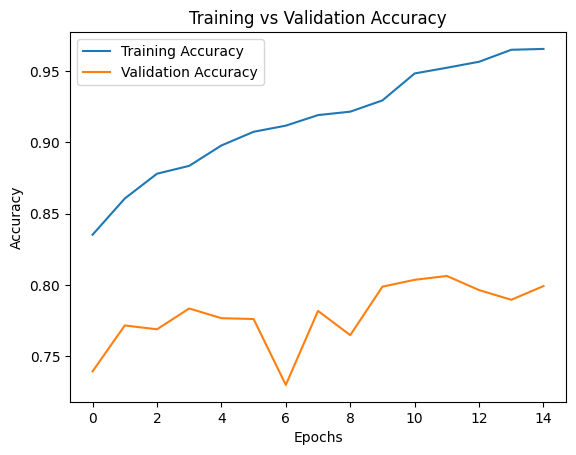

In [9]:

import matplotlib.pyplot as plt
plt.plot(mobilenet_history["accuracy"], label="Training Accuracy")
plt.plot(mobilenet_history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

### Loading EfficientNet's training history

In [10]:
with open("G:\OneDrive\ML-MinorProject\models\efficientnet\efficientnet_training_history.json", "r") as f:
    efficientnet_history = json.load(f)

### Plotting EfficientNet's training accuracy vs validation accuracy

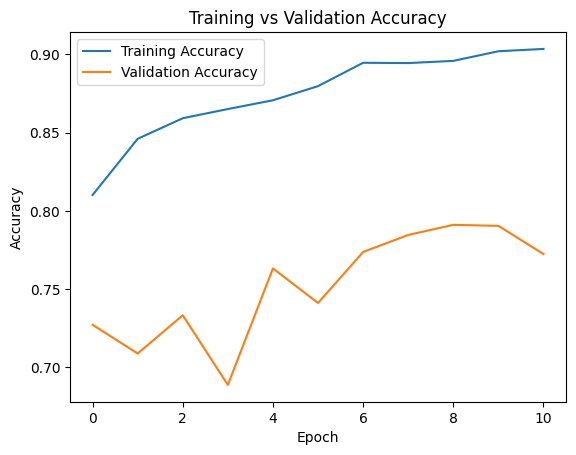

In [14]:
acc_values = [v for k, v in (efficientnet_history['accuracy'].items())]
val_acc_values = [v for k, v in (efficientnet_history['val_accuracy'].items())]
plt.plot(acc_values, label='Training Accuracy')
plt.plot(val_acc_values, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

### Loading ResNet training history

In [16]:
import json
with open(RESNET_TRAINING_HISTORY, "r") as f:
    resnet_history = json.load(f)

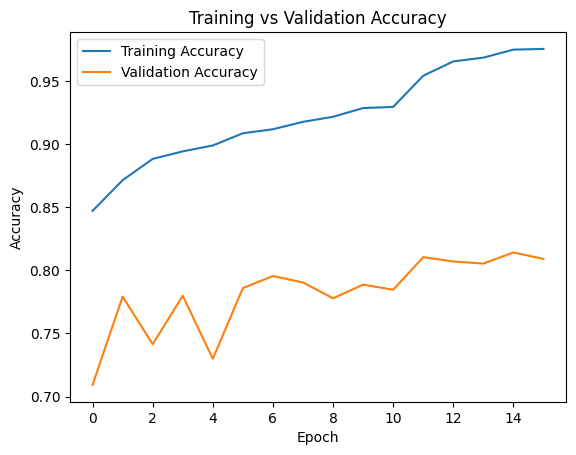

In [17]:
acc_values = [v for k, v in (resnet_history['accuracy'].items())]
val_acc_values = [v for k, v in (resnet_history['val_accuracy'].items())]
plt.plot(acc_values, label='Training Accuracy')
plt.plot(val_acc_values, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [19]:
import json
with open(VGGNET_TRAINING_HISTORY, "r") as f:
    vggnet_history = json.load(f)

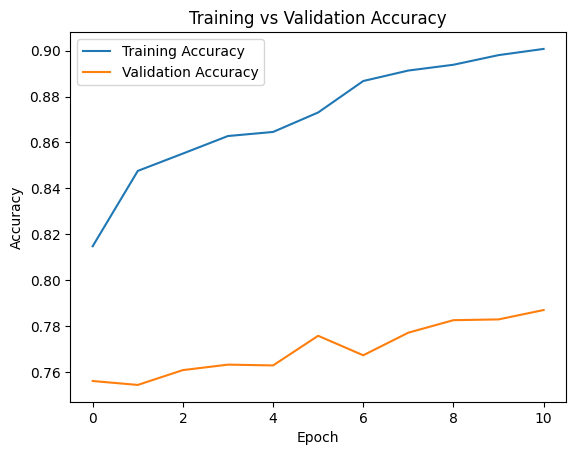

In [20]:
acc_values = [v for k, v in (vggnet_history['accuracy'].items())]
val_acc_values = [v for k, v in (vggnet_history['val_accuracy'].items())]
plt.plot(acc_values, label='Training Accuracy')
plt.plot(val_acc_values, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [23]:
import json
with open(VGGNET_TRAINING_HISTORY, "r") as f:
    densenet_history = json.load(f)

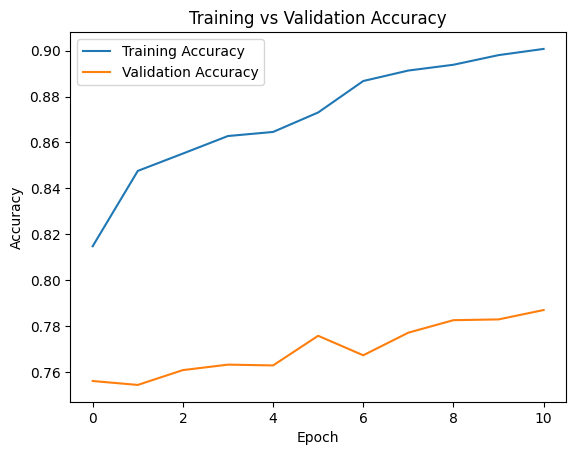

In [24]:
acc_values = [v for k, v in (densenet_history['accuracy'].items())]
val_acc_values = [v for k, v in (densenet_history['val_accuracy'].items())]
plt.plot(acc_values, label='Training Accuracy')
plt.plot(val_acc_values, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

## 2. Load and preprocess test data
We will now load the test data by using ImageDataGenerator to deal with class imbalance

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)  # Ensure consistency with training

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=img_size,
    batch_size=16,
    class_mode="binary",
    shuffle=False
)

Found 1994 images belonging to 2 classes.


## 3. Make predictions

### 3.1 MobileNet predictions

In [33]:
mobilenet_preds = mobilenet_model.predict(test_generator)
mobilenet_preds = (mobilenet_preds > 0.5).astype(int)

125/125 [==============================] - 134s 1s/step


### 3.2 EfficientNet predictions

In [34]:
efficientnet_preds = efficientnet_model.predict(test_generator)
efficientnet_preds = (efficientnet_preds > 0.5).astype(int)

125/125 [==============================] - 103s 808ms/step


### 3.3 ResNet predictions

In [35]:
resnet_preds = resnet_model.predict(test_generator)
resnet_preds = (resnet_preds > 0.5).astype(int)

125/125 [==============================] - 88s 697ms/step


### 3.4 VGGNet predictions

In [36]:
vggnet_preds = vggnet_model.predict(test_generator)
vggnet_preds = (vggnet_preds > 0.5).astype(int)

125/125 [==============================] - 88s 653ms/step


### 3.5 DenseNet predictions

In [37]:
densenet_preds = densenet_model.predict(test_generator)
densenet_preds = (densenet_preds > 0.5).astype(int)

125/125 [==============================] - 82s 632ms/step


## 4. Compute accuracies of each models

In [39]:
from sklearn.metrics import accuracy_score

true_labels = test_generator.classes

mobilenet_acc = accuracy_score(true_labels, mobilenet_preds)
efficientnet_acc = accuracy_score(true_labels, efficientnet_preds)
resnet_acc = accuracy_score(true_labels, resnet_preds)
vggnet_acc = accuracy_score(true_labels, vggnet_preds)
densenet_acc = accuracy_score(true_labels, densenet_preds)
print("MobileNet Accuracy:", mobilenet_acc)
print("EfficientNet Accuracy:", efficientnet_acc)
print("ResNet Accuracy:", resnet_acc)
print("VGGNet Accuracy:", vggnet_acc)
print("DenseNet Accuracy:", densenet_acc)

MobileNet Accuracy: 0.8294884653961886
EfficientNet Accuracy: 0.8069207622868606
ResNet Accuracy: 0.7733199598796389
VGGNet Accuracy: 0.7888665997993982
DenseNet Accuracy: 0.831494483450351


### plotting the graph

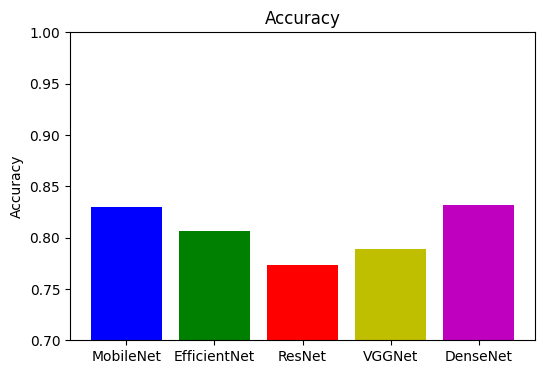

In [45]:
plt.figure(figsize=(6, 4))
models = ['MobileNet', 'EfficientNet', 'ResNet', 'VGGNet', 'DenseNet']
accuracies = [mobilenet_acc, efficientnet_acc, resnet_acc, vggnet_acc, densenet_acc]

plt.bar(models, accuracies, color=['b', 'g', 'r', 'y' ,'m'])
plt.ylim(0.70, 1.0)
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.show()

## 5. Confusion Matrix

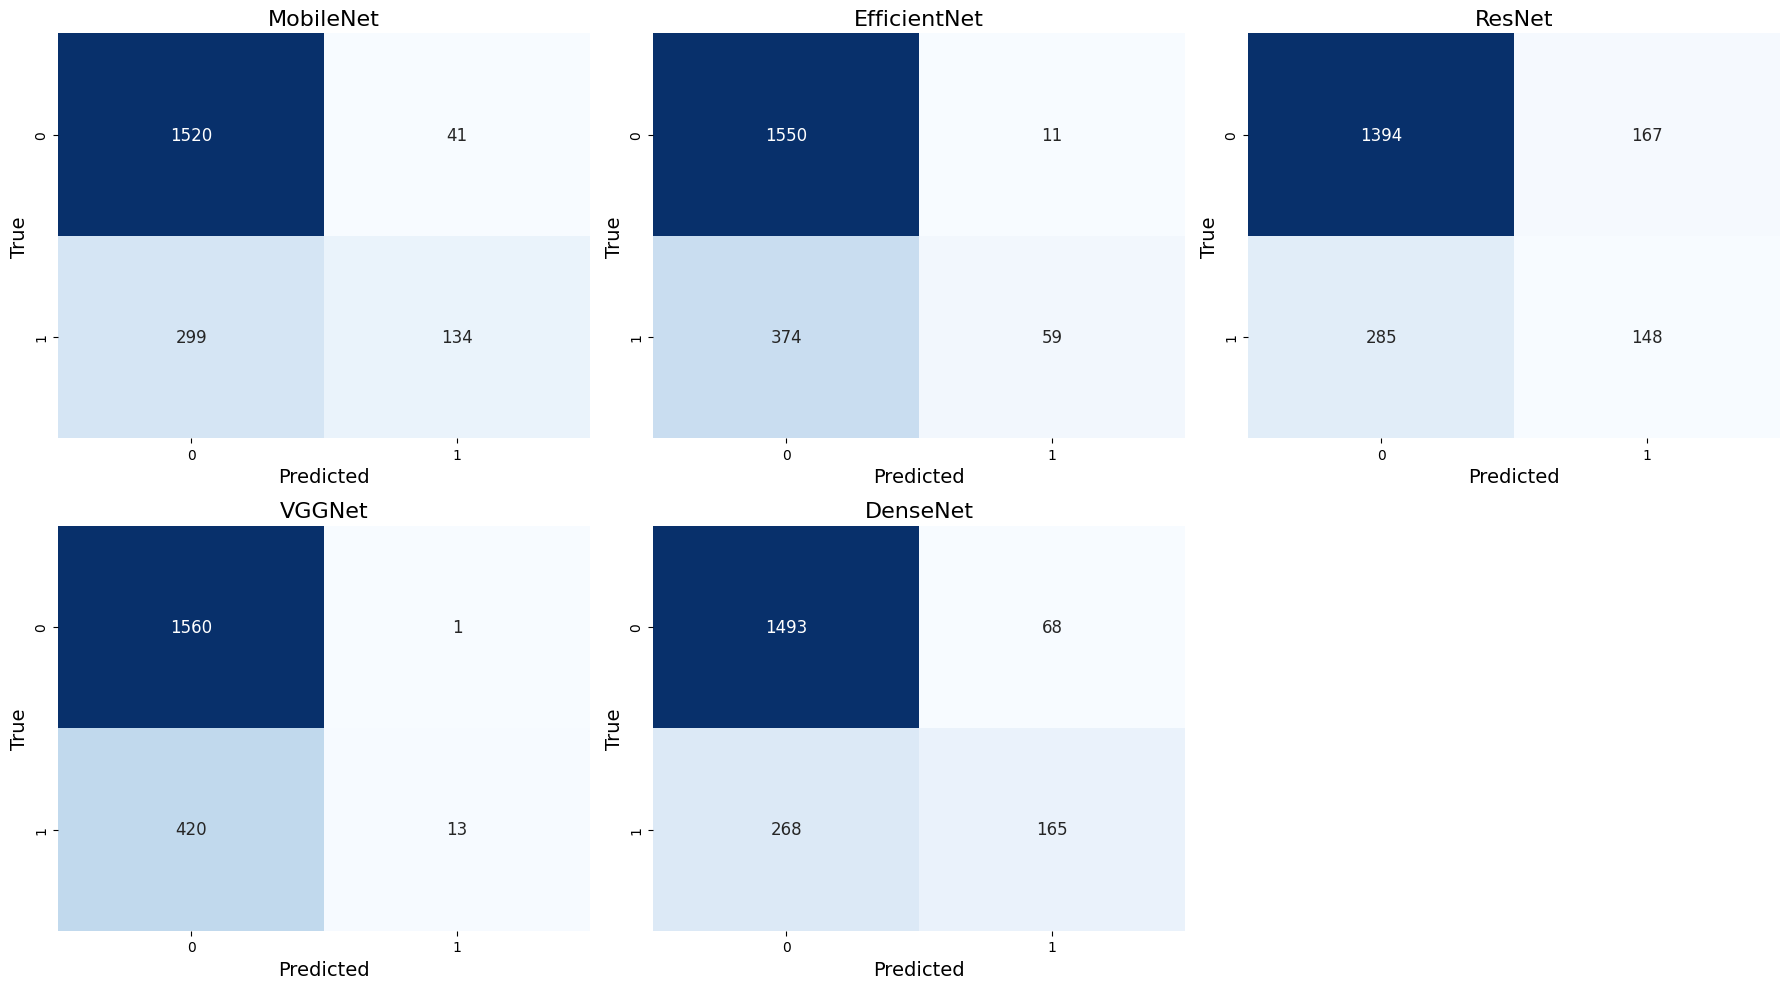

In [68]:
import seaborn as sns
# List of model names and predictions
model_preds = {
    "MobileNet": mobilenet_preds,
    "EfficientNet": efficientnet_preds,
    "ResNet": resnet_preds,
    "VGGNet": vggnet_preds,
    "DenseNet": densenet_preds
}

# Set up the subplot grid (2 rows x 3 columns — enough for 5 models)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Bigger figure
axes = axes.flatten()  # Flatten to easily index

for idx, (model_name, preds) in enumerate(model_preds.items()):
    # Calculate confusion matrix
    cm = confusion_matrix(true_labels, preds)
    
    # Plot confusion matrix heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
                ax=axes[idx], annot_kws={"size": 12})
    axes[idx].set_title(f'{model_name}', fontsize=16)
    axes[idx].set_xlabel('Predicted', fontsize=14)
    axes[idx].set_ylabel('True', fontsize=14)

# If fewer models than subplots, turn off extra empty plots
for i in range(len(model_preds), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## 6. Classification Report

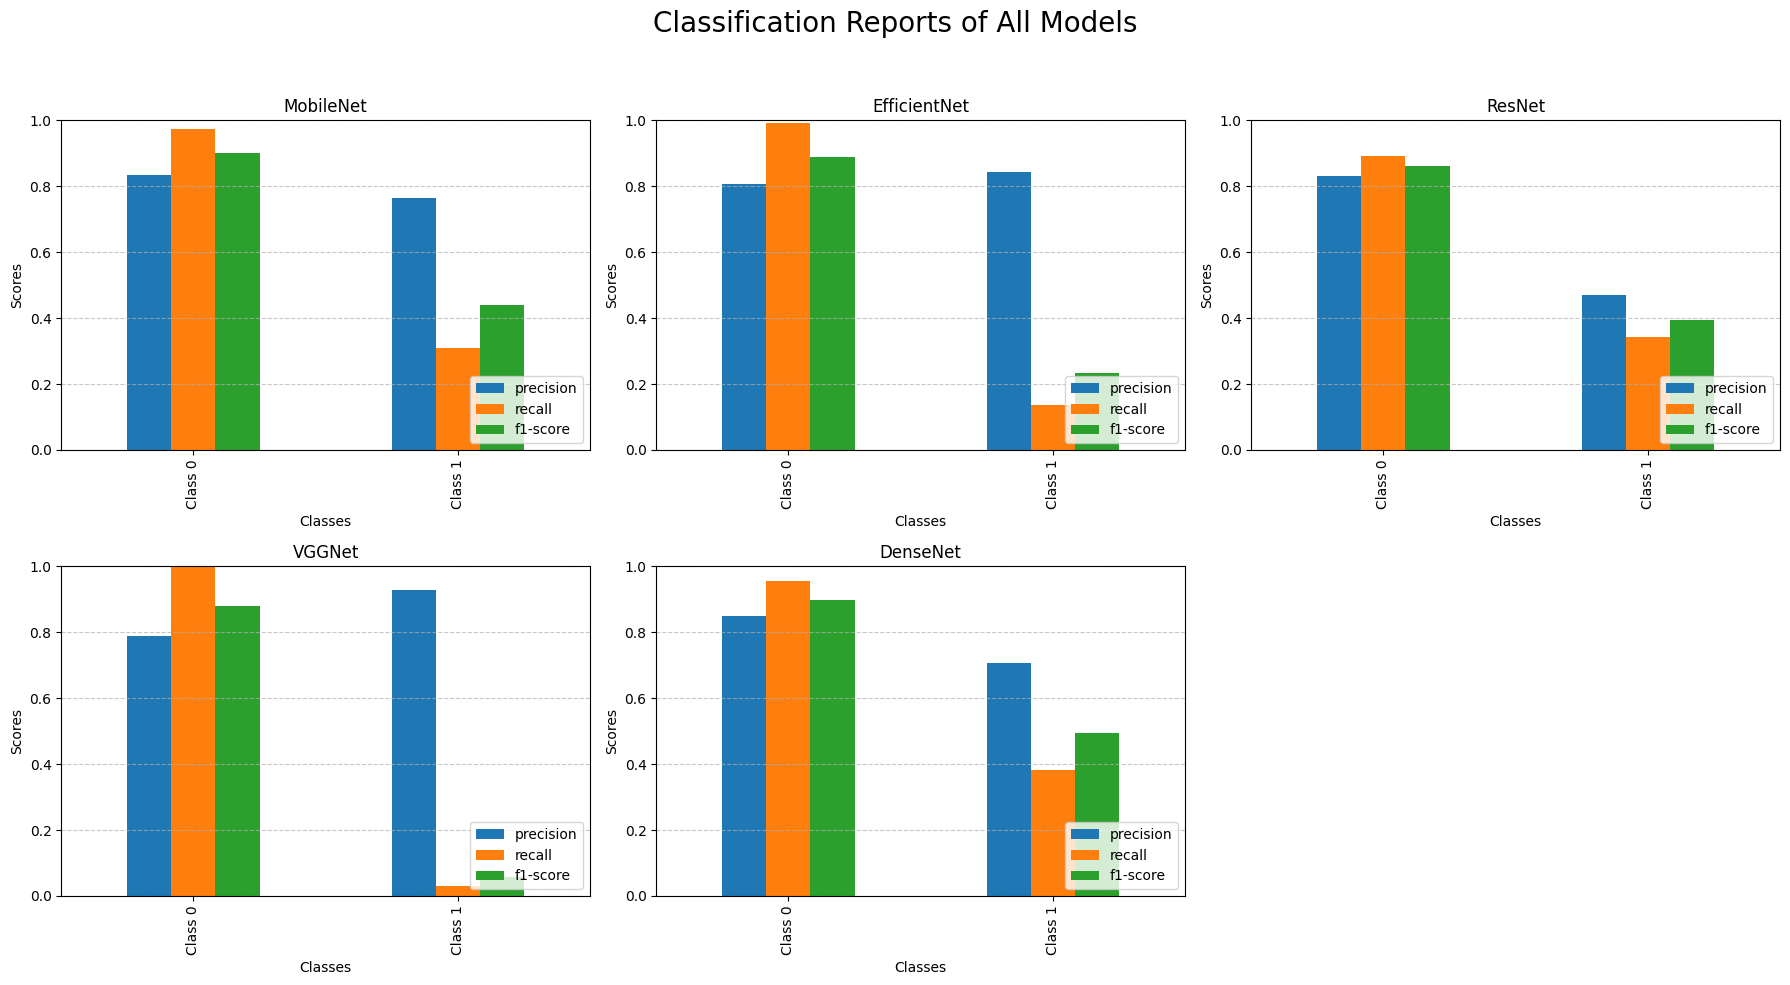

In [66]:
from sklearn.metrics import classification_report
import pandas as pd
def get_report_df(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    classes = ["0", "1"]
    metrics = ["precision", "recall", "f1-score"]
    data = []
    for cls in classes:
        values = [report[cls][metric] for metric in metrics]
        data.append(values)
    return pd.DataFrame(data, index=["Class 0", "Class 1"], columns=metrics)

# Gather all model reports
model_reports = {
    "MobileNet": get_report_df(true_labels, mobilenet_preds),
    "EfficientNet": get_report_df(true_labels, efficientnet_preds),
    "ResNet": get_report_df(true_labels, resnet_preds),
    "VGGNet": get_report_df(true_labels, vggnet_preds),
    "DenseNet": get_report_df(true_labels, densenet_preds),
}

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (model_name, df) in enumerate(model_reports.items()):
    df.plot(kind="bar", ax=axes[idx])
    axes[idx].set_title(f'{model_name}')
    axes[idx].set_ylim(0, 1)
    axes[idx].set_xlabel('Classes')
    axes[idx].set_ylabel('Scores')
    axes[idx].grid(axis='y', linestyle='--', alpha=0.7)
    axes[idx].legend(loc='lower right')

# Remove the last empty subplot (if 5 models only)
if len(model_reports) < len(axes):
    fig.delaxes(axes[-1])

plt.suptitle('Classification Reports of All Models', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

125/125 [==============================] - 77s 619ms/step


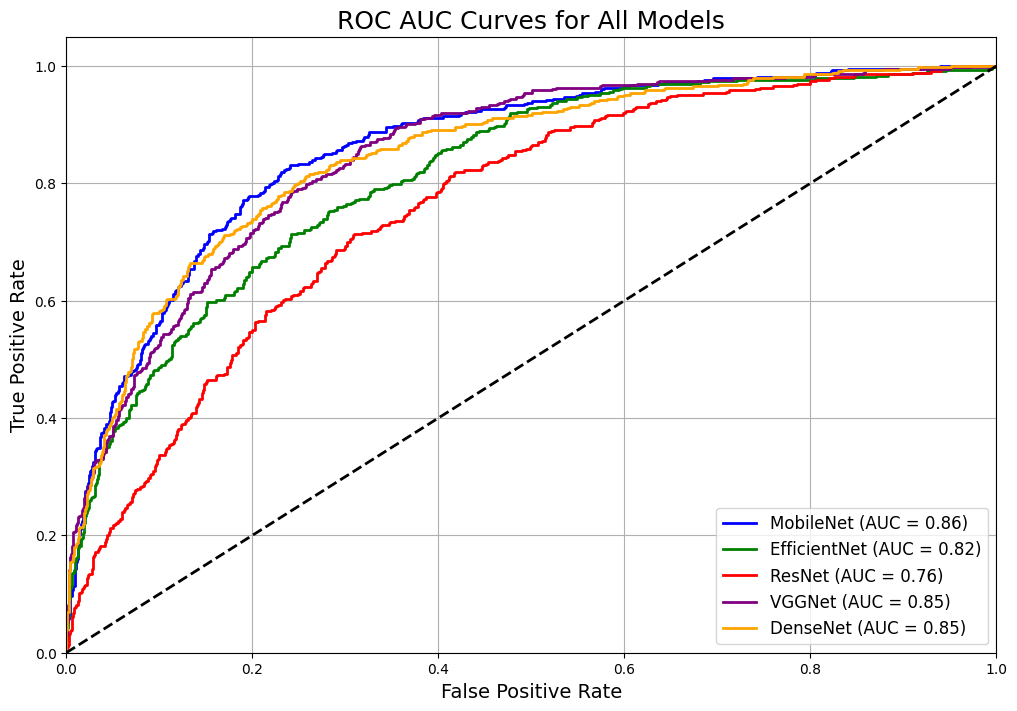

In [67]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(y_true, y_probs, model_name, color):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# First, get probability predictions (not thresholds > 0.5)
mobilenet_probs = mobilenet_model.predict(test_generator)
efficientnet_probs = efficientnet_model.predict(test_generator)
resnet_probs = resnet_model.predict(test_generator)
vggnet_probs = vggnet_model.predict(test_generator)
densenet_probs = densenet_model.predict(test_generator)

# Define models and their predicted probabilities
models_probs = {
    "MobileNet": mobilenet_probs,
    "EfficientNet": efficientnet_probs,
    "ResNet": resnet_probs,
    "VGGNet": vggnet_probs,
    "DenseNet": densenet_probs,
}

# Plot all ROC curves
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange']

for (model_name, probs), color in zip(models_probs.items(), colors):
    plot_roc_curve(true_labels, probs, model_name, color)

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC AUC Curves for All Models', fontsize=18)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()